In this notebook, we're gonna perform EDA and feature engineering on the black friday dataset and will do the model building after learning ML.

Link: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqazVYLV9OOFpTNEc5ZEJ4bkZodnBMbzNPRGYtUXxBQ3Jtc0trSHJFRWVCTUFIRWV0WUJLM3hqUEdZS2VHNEhJWDFDZTNFWkF2QVhfaXpNNk1JTEZIQlVuSTZfQ2lKcjZwakZFeXQyTUlfdzlRT2pSYktXRkZnV0dmZlpuai1jTk1xR1J1NU1GQW9hbWFGV2Jab2Excw&q=https%3A%2F%2Fwww.kaggle.com%2Fsdolezel%2Fblack-friday&v=cGez1q4iOFU

# Feature Engineering - EDA

###**Problem Statement**

A retial company wants to understand customer behaiour (especially the purchase amount) against various products of different categoies. They have shared purchases summary of various customers for selected high volume products from tlast month. The data set also contains customer demographics (age, gender, marital s tate, city_type, product details) and total purchase amount from the last month.

Now they want to build a model to predict the purchase amount of customer against various customer that will help him to create a personalized offer for customers.

## Data Preparation

In [305]:
# importing libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# code for displaying the graphs without plt.show() function
%matplotlib inline
# code to set the default graph/plot size
matplotlib.rcParams['figure.figsize'] = (15, 5)

In [306]:
# loading the dataset and displaying the head
df_train = pd.read_csv('/content/black-friday-train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [307]:
# seeing the shape of the df
df_train.shape

(550068, 12)

In [308]:
# importing the test data for merging purpose
df_test = pd.read_csv('/content/black-friday-test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Only the target variable in not here.

In [309]:
# merging the 2 dataframes as the data is taken from kaggle, so we need to
# have a clear picture/do one time eda/feature engineering and avoid overfitting
df = pd.concat([df_train, df_test], axis = 0)
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


We have some missing information.

In [311]:
# seeing the details of the feature having missing values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [312]:
# dropping the User_ID feature as it has no use for us
df = df.drop('User_ID', axis = 1)

## Handling categorical variables

#### The Gender feature
Performing label encoding i.e. 1 for male and 0 for female for ease. OHE can also be performed.

In [313]:
# seeing null values in the feature
df_test['Gender'].isnull().sum()

0

In [314]:
# performing the encoding
df['Gender'] = df['Gender'].map({'M':1, 'F':0}).astype(int)

In [315]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Age feature
As we know that based on age, the purchase price will vary. We will do target guided ordinal label encoding. We can also OHE (will increase dimensionality) but the selected technique will gonna work more beautifully.

In [316]:
# seeing null count
df['Age'].isnull().sum()

0

In [317]:
len(df['Age'].unique())

7

In [318]:
df['Age'].head(5)

0    0-17
1    0-17
2    0-17
3    0-17
4     55+
Name: Age, dtype: object

Text(0.5, 1.0, 'Aggregate Spending of Individuals based on Age.')

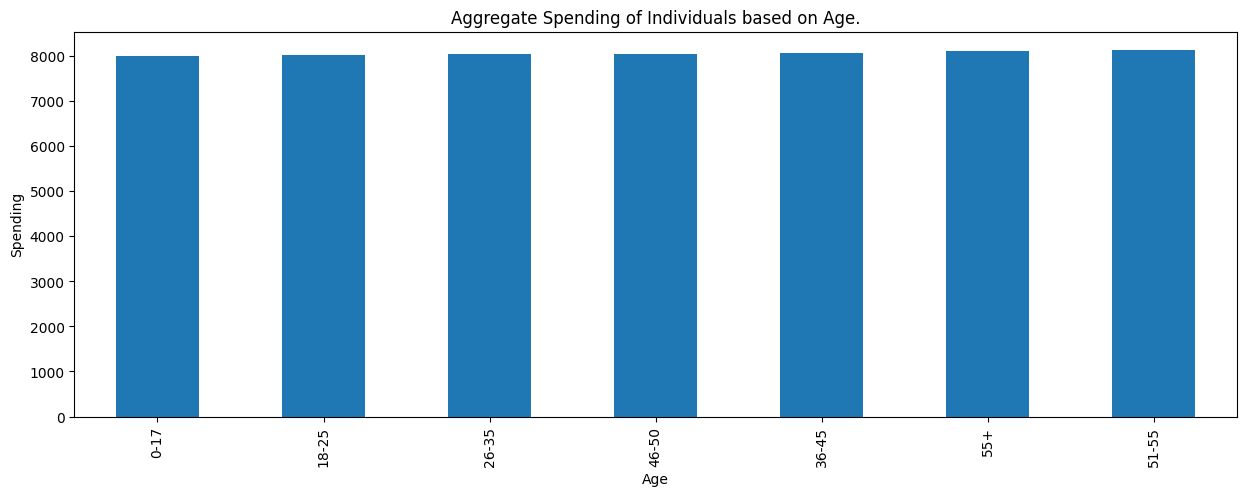

In [319]:
# seeing the relationship based on spending
df.groupby('Age')['Purchase'].median().sort_values(ascending = True).plot.bar()
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Aggregate Spending of Individuals based on Age.')


In [320]:
# extracting the unique categories
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [321]:
# the encoding part
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '46-50': 3, '26-35': 4, '36-45': 5, '55+': 6, '51-55': 7}).astype(int)

In [322]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


#### City Feature
We don't know the description of the categories. So, we're gonna use the onehot encoding.

In [323]:
# seeing the unique categories
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [324]:
# creating dummy features of the city_category feature
city_dummies = pd.get_dummies(df['City_Category'], drop_first = True)
city_dummies.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [325]:
# concatenating the dummies and handling the previous city_category feature
df = pd.concat([df, city_dummies], axis = 1)
# dropping
df = df.drop('City_Category', axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,NaN,NaN,7969.0,0,1


## Missing values Handling

In [326]:
# checking missing values in each feature and printing the results
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [327]:
df.shape

(783667, 12)

In [328]:
df['Age'].isnull().sum()

0

In [329]:
# seeing the percentage of missing values

# getting total rows count
data_size = df.shape[0]

# looping through each feature, calculating its null valuess and displaying the percentage of missing values if there're any.
for feat in df.columns:
  feat_na_c = df[feat].isnull().sum()
  # condition for missing values
  if feat_na_c > 0:
    print(f"{feat} : {np.round((feat_na_c / data_size) * 100, 2)} %")

Product_Category_2 : 31.39 %
Product_Category_3 : 69.65 %
Purchase : 29.81 %


### EDA (required for proper imputation)

#### For Product_Category_2 Feature

In [330]:
# seeing the unique values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [331]:
# soring the unique values descendingly based on their occurence count
df['Product_Category_2'].value_counts().sort_values(ascending = False)

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

We're gonna impute using mode (the most occuring value) i.e. 8.0 because the feature is categorical. It is looking like numerical because it is already encoded. Values are from 2 to 17.

In [332]:
# doing the imputation
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [333]:
# checking the missing values
df['Product_Category_2'].isnull().sum()

0

#### For Product_Category_3 Feature

In [334]:
# seeing the missing count
df['Product_Category_3'].isnull().sum()

545809

In [335]:
# sorting in descending order
df['Product_Category_3'].value_counts().sort_values(ascending = False)

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [336]:
# again using mode for imputation (good for categorical variables)
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [337]:
# checking the missing values
df['Product_Category_3'].isnull().sum()

0

In [338]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

Only purchase feature has the missing values now. Because of test data.

In [339]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


#### Stay_In_Current_City_Years Feature

In [340]:
# seeing the uniques values
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

We have 4+ as a category, we have to remove the +

In [341]:
# performing the encoding part
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '', regex = False)
# seeing the unique values
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

### Product_ID Feature

In [342]:
# seeing the data
df['Product_ID'].head()

0    P00069042
1    P00248942
2    P00087842
3    P00085442
4    P00285442
Name: Product_ID, dtype: object

In [343]:
# seeing the total values in the feature
len(df['Product_ID'])

783667

In [344]:
# checking the number of values that are starting with P
len(df[df['Product_ID'].str.startswith('P')])

783667

In [345]:
# In order to convert this feature into numerical, we can only remove the P from the start and everything will be fine
# Let's do it
df['Product_ID'] = df['Product_ID'].str.replace('P', '', regex = False).astype(int)

In [346]:
# seeing the data types
df.dtypes

Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [347]:
# seeing the unique values
len(df['Product_ID'].unique())

3677

In [348]:
# seeing t he head
df.head(3)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,69042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,87842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0


The values in the product head are huge, we can't directly use these in the model. We have to either scale these or encode these. Let's try doing frequency encoding.

In [349]:
# the encoding part
df['Product_ID'] = df['Product_ID'].map(df['Product_ID'].value_counts())

In [350]:
df.head(5)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,344,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,845,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,150,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,496,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,283,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


There is a lot difference still. We'll try training the model with this data and after scaling this data.

## Type Correction

In [351]:
# seeing data types of the features
df.dtypes

Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

We have 2 features as type category and 2 as uint8.

In [352]:
# converting Stay_In_Current_City_Years feature to int
df[['Stay_In_Current_City_Years', 'B', 'C']] = df[['Stay_In_Current_City_Years', 'B', 'C']].astype(int)

In [353]:
# again checking the data types
df.dtypes

Product_ID                      int64
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               int64
C                               int64
dtype: object

## EDA

In [354]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,344,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,845,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,150,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,496,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,283,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [355]:
df['Product_ID'].value_counts()

765     3060
2709    2709
886     2658
880     2640
438     2628
        ... 
100      200
3        171
5        165
2        156
1        132
Name: Product_ID, Length: 803, dtype: int64

We've 3677 different products.

In [356]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

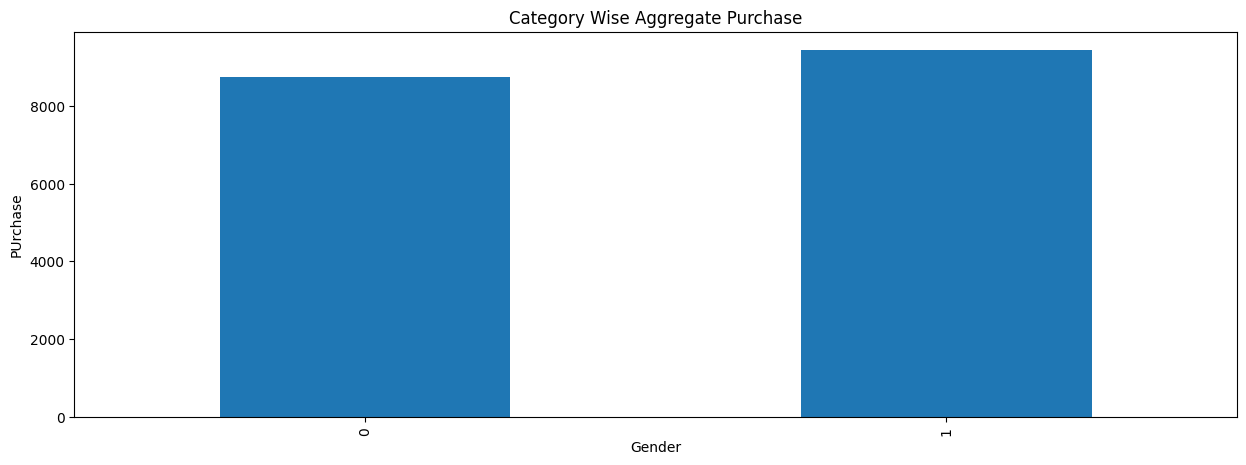

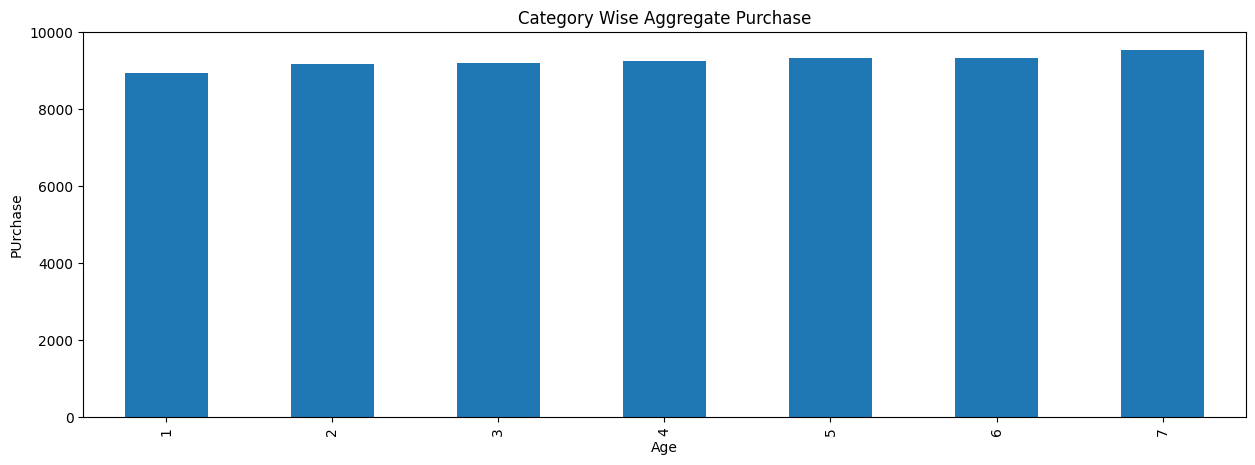

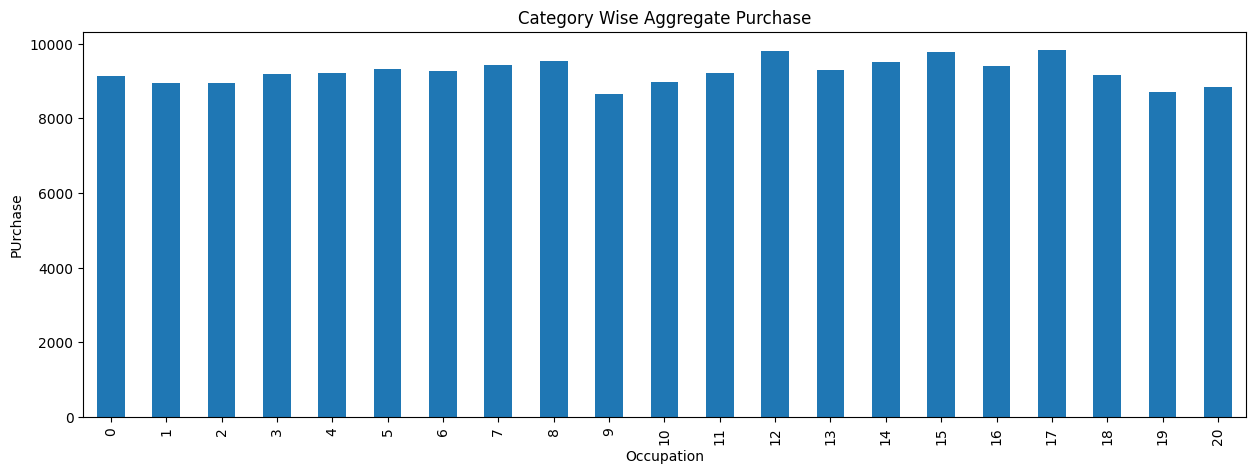

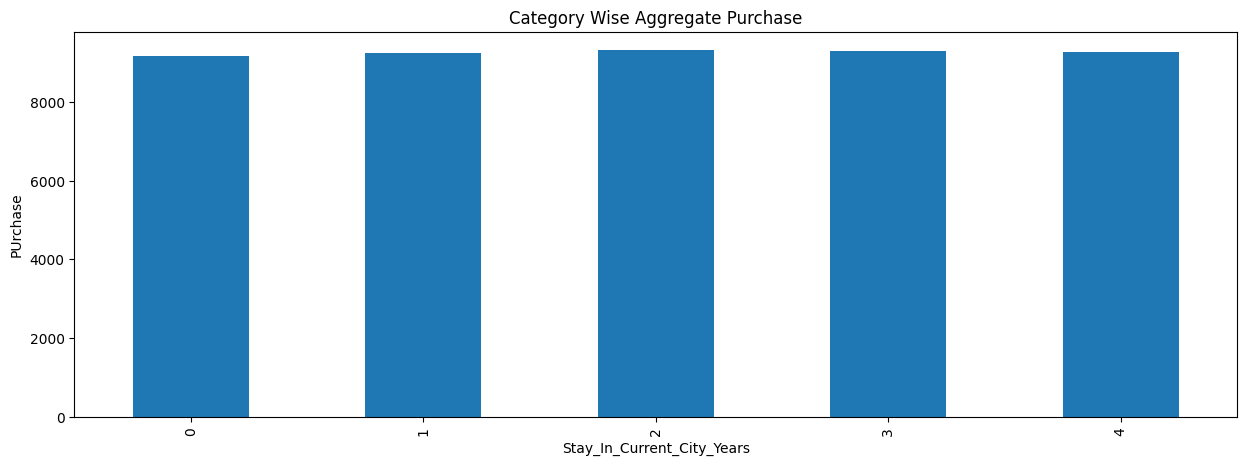

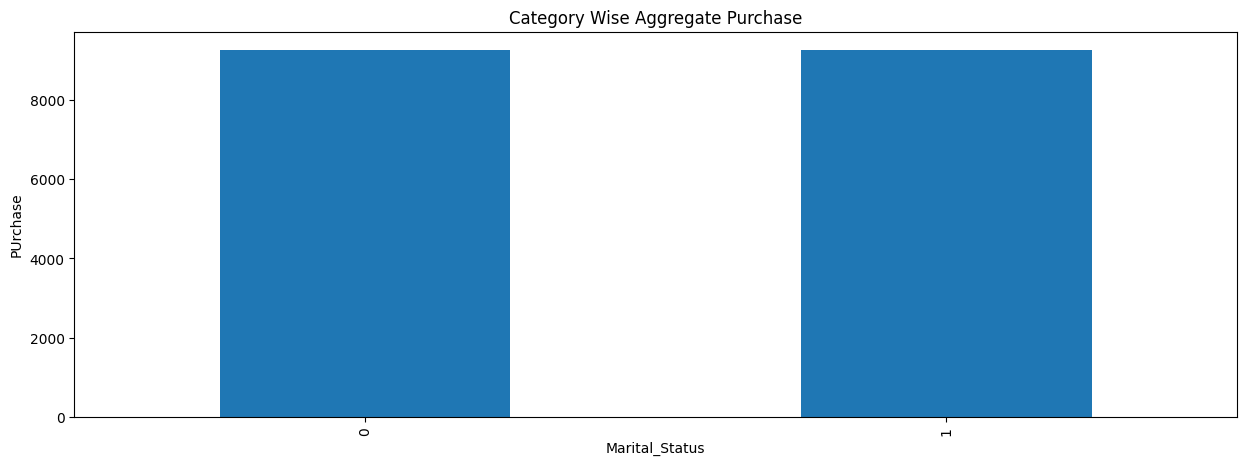

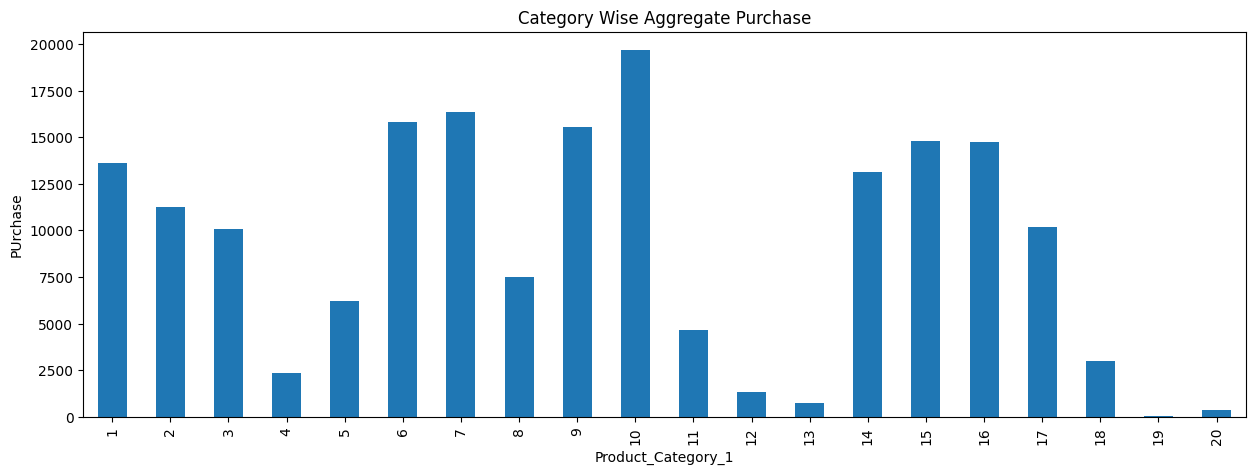

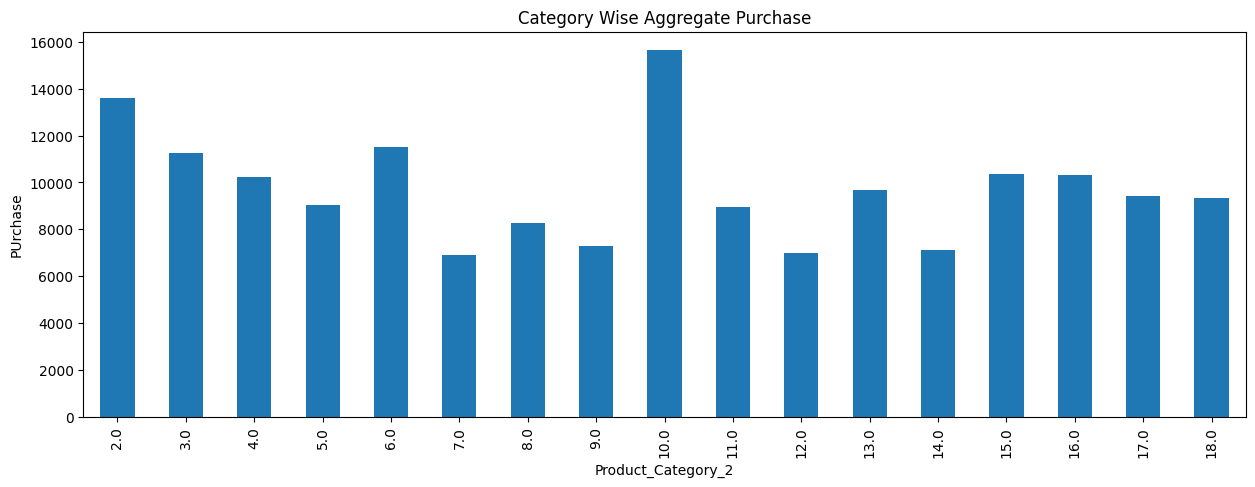

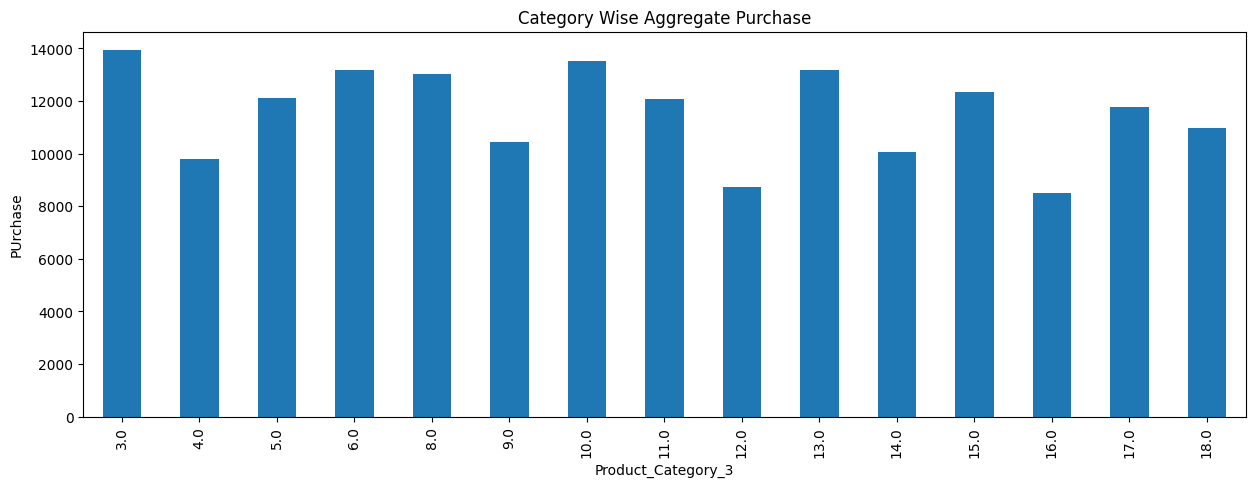

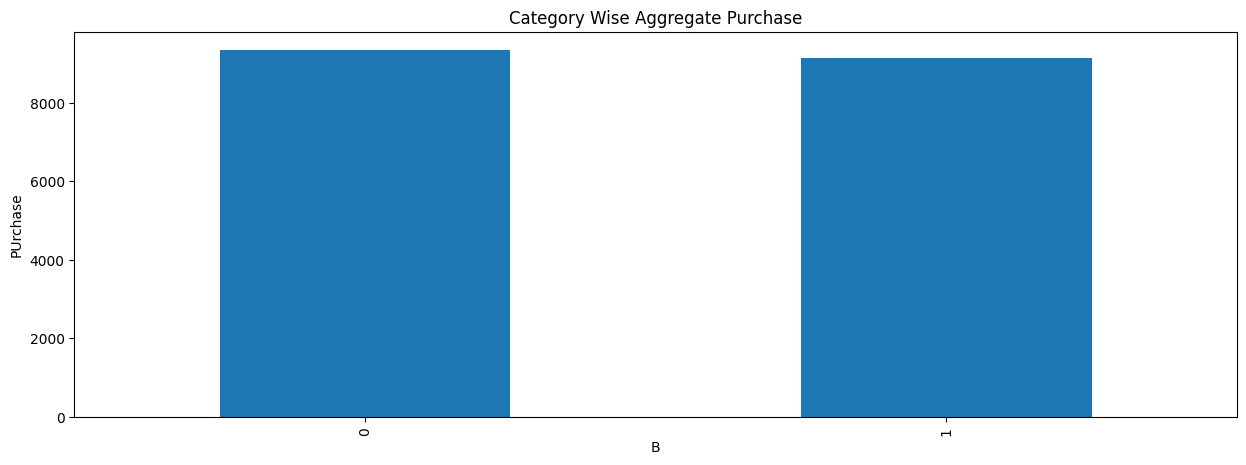

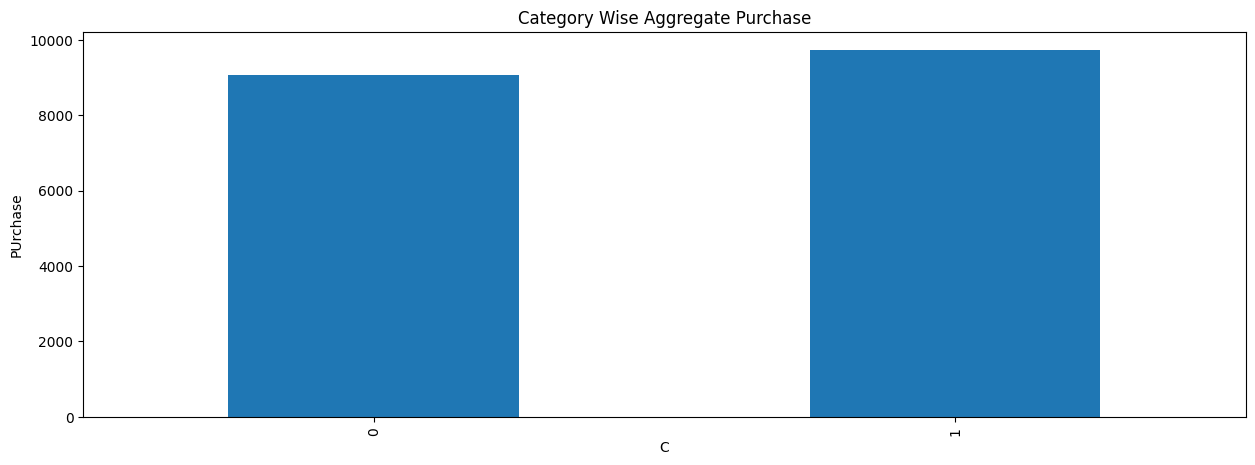

In [357]:
# seeing relationship of features with target feature
for feat in df.columns:
  # checking if the feature is Product_ID or Purchase then
  if feat not in ['Product_ID', 'Purchase']:
    # creating bar plot using the mean of the purchase amount
    df.groupby(feat)['Purchase'].mean().plot.bar()
    # putting labels for easy understanding
    plt.xlabel(feat)
    plt.ylabel('PUrchase')
    plt.title('Category Wise Aggregate Purchase')
    plt.show()

Men have made more sales than women.

<Axes: xlabel='Age', ylabel='Purchase'>

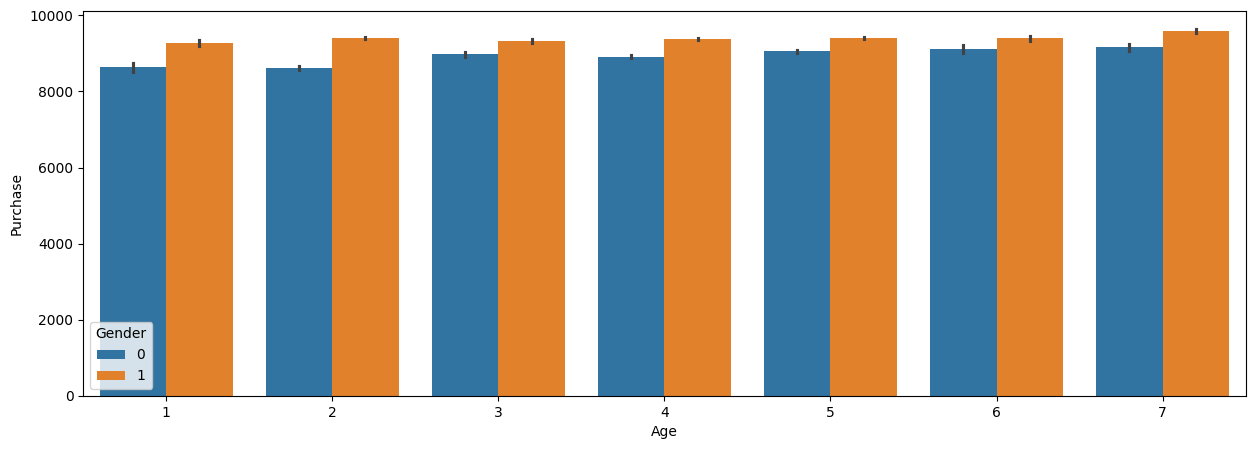

In [358]:
# using seaborn to see the relationship
sns.barplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')

Purchase of men is high.

<Axes: xlabel='Occupation', ylabel='Purchase'>

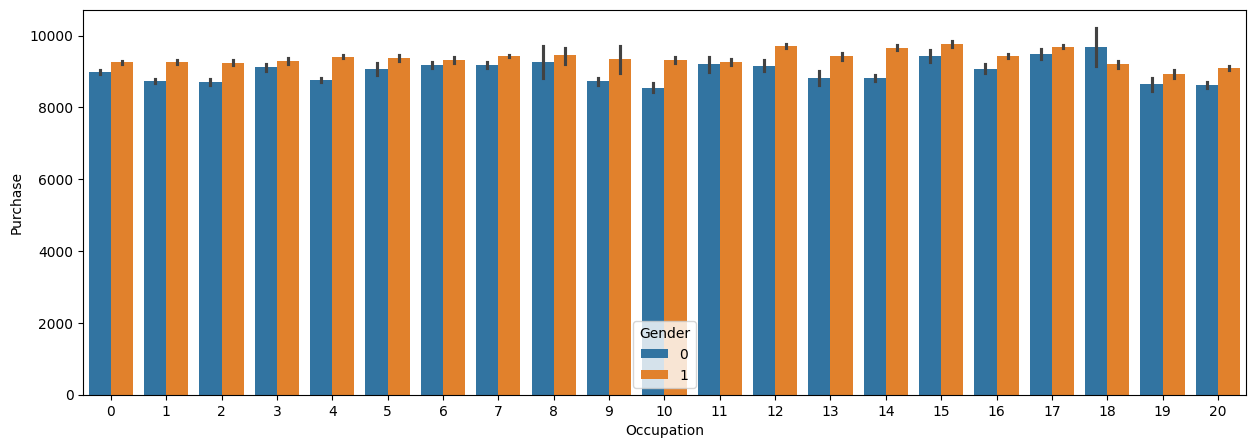

In [359]:
sns.barplot(data = df, x = 'Occupation', y = 'Purchase', hue = 'Gender')

The distribution is quite uniform. We can see other graphs. As I already have seen the distributions so let's more towards feature scaling and train_test_split.

## Train Test Split

In [360]:
# preparing test data
df_test = df[df['Purchase'].isnull()]
# preparing train data by getting the rows where purchase feature has a value except na
df_train = df[~df['Purchase'].isnull()]

In [361]:
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1333,1,3,7,2,1,1,11.0,16.0,NaN,1,0
1,371,1,4,17,0,0,3,5.0,16.0,NaN,0,1
2,217,0,5,1,4,1,5,14.0,16.0,NaN,1,0
3,23,0,5,1,4,1,4,9.0,16.0,NaN,1,0
4,781,0,4,1,1,0,4,5.0,12.0,NaN,0,1


In [362]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,344,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,845,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,150,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,496,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,283,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [363]:
# preparing x
x = df_train.drop('Purchase', axis = 1)
# preparing y (the target feature)
y = df_train['Purchase']

# doing train_test_split for training data (for evaluation)
from sklearn.model_selection import train_test_split

# the splittion part using .33 % test_size
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = .33, random_state = 20
    )

# printing shapes
print(f"shape x_train: {x_train.shape} \n\nshape x_test: {y_train.shape}")
print(f"shape y_train: {x_test.shape} \n\nshape y_test: {y_test.shape}")

shape x_train: (368545, 11) 

shape x_test: (368545,)
shape y_train: (181523, 11) 

shape y_test: (181523,)


In [364]:
# seeing hte data
df['Product_ID'].head(5)

0    344
1    845
2    150
3    496
4    283
Name: Product_ID, dtype: int64

## Feature Scaling


We're doing it as now we've all the features encoded.

In [365]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# doing fit_transform for training data (only fit for test data)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [366]:
x_test

array([[ 0.56914153,  0.5718515 ,  0.02774465, ...,  0.73393365,
        -0.85075491,  1.48524939],
       [-0.36591274,  0.5718515 ,  0.72757016, ...,  0.73393365,
        -0.85075491,  1.48524939],
       [-0.08907473, -1.74870575,  0.02774465, ...,  0.36930177,
        -0.85075491,  1.48524939],
       ...,
       [ 4.00541759,  0.5718515 , -0.67208087, ...,  0.36930177,
        -0.85075491,  1.48524939],
       [-0.99121819,  0.5718515 , -0.67208087, ...,  0.36930177,
         1.17542666, -0.6732876 ],
       [-0.97379482,  0.5718515 , -0.67208087, ...,  0.36930177,
         1.17542666, -0.6732876 ]])

## The data is ready for the model now.